In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import MonthEnd
import matplotlib.pyplot as plt
import scipy.stats as sp
from arch import arch_model
from arch.univariate import ZeroMean,GARCH,Normal,EWMAVariance
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("data.xlsx" ,index_col=0, parse_dates=True)

In [3]:
df

,Equities,Tsies,CorpIG,AbsReturn,Gold,Oil
date,,,,,,
1986-10-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1986-11-03,100.621000,100.350693,100.169884,99.888000,101.296758,96.393443
1986-11-04,100.853435,100.210050,100.336838,100.069796,101.745636,98.688525
1986-11-05,101.086406,100.703160,100.503793,100.616177,101.059850,97.901639
1986-11-06,100.865027,100.138867,100.480361,100.714781,101.882793,98.885246
...,...,...,...,...,...,...
2021-10-25,4081.420245,152.128638,1029.079406,1609.593575,450.187032,555.016393
2021-10-26,4083.052813,152.268491,1031.343546,1600.354508,445.274314,561.573770
2021-10-27,4052.021612,153.534099,1038.844791,1589.936200,447.693267,542.032787


# Creating Returns and Analysing results

In [4]:
df_d_ret=df/df.shift(1)-1
df_d_ret.dropna(inplace=True)
df_d_ret

,Equities,Tsies,CorpIG,AbsReturn,Gold,Oil
date,,,,,,
1986-11-03,0.00621,0.003507,0.001699,-0.00112,0.012968,-0.036066
1986-11-04,0.00231,-0.001402,0.001667,0.00182,0.004431,0.023810
1986-11-05,0.00231,0.004921,0.001664,0.00546,-0.006740,-0.007973
1986-11-06,-0.00219,-0.005604,-0.000233,0.00098,0.008143,0.010047
1986-11-07,0.00001,-0.005583,-0.002303,0.00252,-0.000857,0.004642
...,...,...,...,...,...,...
2021-10-25,0.00580,0.001838,0.001437,-0.00630,-0.001659,0.001301
2021-10-26,0.00040,0.000919,0.002200,-0.00574,-0.010913,0.011815
2021-10-27,-0.00760,0.008312,0.007273,-0.00651,0.005432,-0.034797


In [5]:
df_d_ret_2=df_d_ret+1
df_monthly_ret=df_d_ret_2.groupby(pd.Grouper(freq='M')).prod()-1
df_monthly_ret

,Equities,Tsies,CorpIG,AbsReturn,Gold,Oil
date,,,,,,
1986-11-30,0.015783,0.013404,0.017311,0.015520,-0.028678,-0.016393
1986-12-31,-0.028032,-0.005662,0.011171,0.013714,-0.001926,0.195333
1987-01-31,0.128832,0.003491,0.015917,-0.022385,0.030225,0.044618
1987-02-28,0.048564,-0.000733,0.007259,-0.057454,0.013358,-0.121730
1987-03-31,0.020713,-0.022195,-0.005064,0.053161,0.037329,0.144073
...,...,...,...,...,...,...
2021-06-30,0.027363,0.012022,0.016835,-0.072918,-0.072002,0.108732
2021-07-31,0.012483,0.019682,0.012074,0.022422,0.035505,0.005577
2021-08-31,0.029175,-0.005652,-0.001959,-0.014198,-0.005970,-0.074395


In [6]:
weights_aug=pd.DataFrame(index=["weights"],columns=df.columns,data=[[0.4,0.2,0.05,0.2,0.15,0.0]])

In [7]:
(weights_aug*100).applymap('{:,.1f}%'.format)

,Equities,Tsies,CorpIG,AbsReturn,Gold,Oil
weights,40.0%,20.0%,5.0%,20.0%,15.0%,0.0%


In [8]:
portfolio_ret_d_aug=pd.DataFrame(index=df_d_ret.index,columns=["ret"], data=np.dot(df_d_ret,weights_aug.T)).dropna()

In [9]:
portfolio_ret_m_aug=pd.DataFrame(index=df_monthly_ret.index,columns=["ret"], data=np.dot(df_monthly_ret,weights_aug.T))

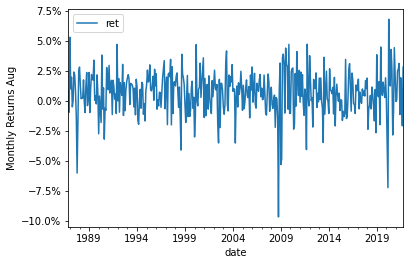

In [10]:
ax = (portfolio_ret_m_aug*100).plot()
plt.ylabel('Monthly Returns Aug')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

array([[<AxesSubplot:title={'center':'ret'}>]], dtype=object)

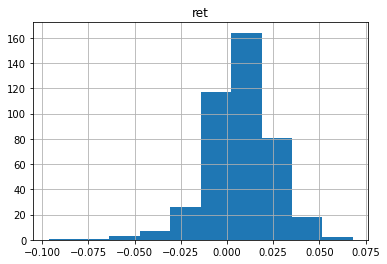

In [11]:
ax = portfolio_ret_m_aug.hist()
ax

In [12]:
mean_m_aug = portfolio_ret_m_aug['ret'].mean()
std_m_aug = portfolio_ret_m_aug['ret'].std()
max_m_aug = portfolio_ret_m_aug['ret'].max()
min_m_aug = portfolio_ret_m_aug['ret'].min()
kurt_m_aug = sp.kurtosis(portfolio_ret_m_aug['ret'])
skew_m_aug = sp.skew(portfolio_ret_m_aug['ret'])

In [13]:
normalized_portfolio_ret_m_aug=(portfolio_ret_m_aug-mean_m_aug)/std_m_aug

In [14]:
normalized_portfolio_ret_m_aug

,ret
date,
1986-11-30,0.108994
1986-12-31,-0.868556
1987-01-31,2.522151
1987-02-28,0.190108
1987-03-31,0.715381
...,...
2021-06-30,-0.969569
2021-07-31,0.689267
2021-08-31,0.002761


In [15]:
mean_norm_m_aug = normalized_portfolio_ret_m_aug['ret'].mean()
std_norm_m_aug = normalized_portfolio_ret_m_aug['ret'].std()
max_norm_m_aug = normalized_portfolio_ret_m_aug['ret'].max()
min_norm_m_aug = normalized_portfolio_ret_m_aug['ret'].min()
kurt_norm_m_aug = sp.kurtosis(normalized_portfolio_ret_m_aug['ret'])
skew_norm_m_aug = sp.skew(normalized_portfolio_ret_m_aug['ret'])

# Fitting Garch Model

In [16]:
model_garch_aug = arch_model(y=portfolio_ret_m_aug['ret']*100, rescale=True, mean='Zero')
res_garch_m_aug = model_garch_aug.fit(backcast=(portfolio_ret_m_aug['ret'][0]*100)**2)
res_garch_m_aug

Iteration:      1,   Func. Count:      5,   Neg. LLF: 928.1627018538229
Iteration:      2,   Func. Count:     12,   Neg. LLF: 877.8222630351756
Iteration:      3,   Func. Count:     18,   Neg. LLF: 880.2302270269513
Iteration:      4,   Func. Count:     24,   Neg. LLF: 870.0320852822867
Iteration:      5,   Func. Count:     29,   Neg. LLF: 869.9898998424794
Iteration:      6,   Func. Count:     33,   Neg. LLF: 869.9866681095808
Iteration:      7,   Func. Count:     37,   Neg. LLF: 869.9863860536977
Iteration:      8,   Func. Count:     41,   Neg. LLF: 869.9856754319256
Iteration:      9,   Func. Count:     45,   Neg. LLF: 869.9856427234755
Iteration:     10,   Func. Count:     48,   Neg. LLF: 869.9856427234313
Optimization terminated successfully    (Exit mode 0)
            Current function value: 869.9856427234755
            Iterations: 10
            Function evaluations: 48
            Gradient evaluations: 10


                       Zero Mean - GARCH Model Results                        
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                      GARCH   Log-Likelihood:               -869.986
Distribution:                  Normal   AIC:                           1745.97
Method:            Maximum Likelihood   BIC:                           1758.09
                                        No. Observations:                  420
Date:                Tue, Feb 08 2022   Df Residuals:                      420
Time:                        03:54:30   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.3217      0.909      1.453      0.146    [ -

In [17]:
scale_aug = res_garch_m_aug.scale
scale_aug

1.0

In [18]:
forecasts_garch_m_aug = res_garch_m_aug.forecast(horizon=1, reindex=True)

In [19]:
vol_garch_for_m_aug = (forecasts_garch_m_aug.variance.iloc[-1]/10000)**0.5

In [20]:
std_m_aug

0.018408059477582565

In [21]:
vol_garch_for_m_aug[0]

0.020642583964926953

# Fitting EWMA Model

In [22]:
am_m_aug = ZeroMean(portfolio_ret_m_aug['ret']*100)
am_m_aug.volatility = EWMAVariance(None)
am_m_aug.volatility.starting_values((portfolio_ret_m_aug['ret']**2)*100)
am_m_aug.distribution = Normal()
res_m_aug = am_m_aug.fit(backcast=(portfolio_ret_m_aug['ret'][0]*100)**2)
res_m_aug

Iteration:      1,   Func. Count:      3,   Neg. LLF: 1395.7972759008592
Iteration:      2,   Func. Count:      6,   Neg. LLF: 899.7530438188779
Iteration:      3,   Func. Count:      9,   Neg. LLF: 899.2797183947242
Iteration:      4,   Func. Count:     11,   Neg. LLF: 899.2780977504908
Iteration:      5,   Func. Count:     13,   Neg. LLF: 899.2780941797025
Iteration:      6,   Func. Count:     14,   Neg. LLF: 899.2780941796323
Optimization terminated successfully    (Exit mode 0)
            Current function value: 899.2780941797025
            Iterations: 6
            Function evaluations: 14
            Gradient evaluations: 6


                  Zero Mean - EWMA/RiskMetrics Model Results                  
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:           EWMA/RiskMetrics   Log-Likelihood:               -899.278
Distribution:                  Normal   AIC:                           1800.56
Method:            Maximum Likelihood   BIC:                           1804.60
                                        No. Observations:                  420
Date:                Tue, Feb 08 2022   Df Residuals:                      420
Time:                        03:54:30   Df Model:                            0
                            Volatility Model                            
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
lam            0.9605  4.320e-02     22.233 1.640e-109 [  0.876,  1.04

In [23]:
forecasts_res_m_aug = res_m_aug.forecast(horizon=1, reindex=True)
vol_ewma_for_m_aug = (forecasts_res_m_aug.variance.iloc[-1]/10000)**0.5

vol_ewma_for_m_aug[0]

0.024583528233444438

# Definging Garch and Emwa Volatilities
# Definging Forecast Parameters: Omega, Alpha, Beta, Lambda

In [24]:
forc_vol_emwa_m_aug = (forecasts_res_m_aug.variance.iloc[-1]/10000)**0.5

In [25]:
forc_vol_garch_m_aug= (forecasts_garch_m_aug.variance.iloc[-1]/10000)**0.5

In [26]:
omega_m_aug = res_garch_m_aug.params[0]/10000
alpha_m_aug = res_garch_m_aug.params[1]
beta_m_aug = res_garch_m_aug.params[2]
lamb_m_aug = res_m_aug.params[0]

In [27]:
lt_var_m_aug = omega_m_aug/(1-alpha_m_aug-beta_m_aug)
lt_vol_m_aug = lt_var_m_aug**(1/2)

In [28]:
obsv_vol_m_aug = portfolio_ret_m_aug['ret'].std()

obsv_vol_m_aug

0.018408059477582565

In [29]:
L1_m_aug = [alpha_m_aug.round(4), beta_m_aug.round(4), (omega_m_aug*10000).round(4), lamb_m_aug.round(4)]
L2_m_aug = [np.round(obsv_vol_m_aug, 4), forc_vol_garch_m_aug[0].round(4), forc_vol_emwa_m_aug[0].round(4), lt_vol_m_aug.round(4)]

In [30]:
est_patam_m_aug = pd.DataFrame(columns=['Alpha', 'Beta', 'Omega', 'Lamda'])
vols_m_aug = pd.DataFrame(columns=['Obsv. Vola', 'Vola GARCH', 'Vola EWMA', 'LT Vola GARCH'])

In [31]:
est_patam_m_aug.loc['Values'] = L1_m_aug

est_patam_m_aug.applymap('{:,.2f}'.format)

,Alpha,Beta,Omega,Lamda
Values,0.12,0.53,1.32,0.96


In [32]:
vols_m_aug.loc['Values'] = L2_m_aug

(vols_m_aug*100).applymap('{:,.2f}%'.format)

,Obsv. Vola,Vola GARCH,Vola EWMA,LT Vola GARCH
Values,1.84%,2.06%,2.46%,1.95%


## Cerating DataFrame with EWMA weights

In [33]:
L_weights_emwa_m_aug = []

In [34]:
for t in range(0, len(portfolio_ret_m_aug)):
    L_weights_emwa_m_aug.append((lamb_m_aug**t)*(1-lamb_m_aug))

In [35]:
L_weights_emwa_m_aug.reverse()

In [36]:
weights_emwa_m_aug = pd.DataFrame(columns=['weights', 'acum_weights'])
weights_emwa_m_aug['weights'] = L_weights_emwa_m_aug

In [37]:
for y in range(0, len(weights_emwa_m_aug)):
    if y==0:
        weights_emwa_m_aug.iloc[y, 1] = weights_emwa_m_aug.iloc[y, 0]
    else: weights_emwa_m_aug.iloc[y, 1] = weights_emwa_m_aug.iloc[y-1, 1] + weights_emwa_m_aug.iloc[y, 0]

In [38]:
weights_emwa_m_aug.index=portfolio_ret_m_aug.index
weights_emwa_m_aug.tail(15)

,weights,acum_weights
date,,
2020-08-31,0.022478,0.568448
2020-09-30,0.023404,0.591852
2020-10-31,0.024367,0.616219
2020-11-30,0.025370,0.641589
2020-12-31,0.026415,0.668004
2021-01-31,0.027502,0.695507
2021-02-28,0.028635,0.724141
2021-03-31,0.029814,0.753955
2021-04-30,0.031041,0.784996


# Preparing DataFrame to generate data (portfolio_ret_m)

### Columns: Returns, Conditional Var Garch, Conditional Var Emwa, Conditional Vol Garch, Conditonal Vol Emwa, Model Vol Garch, Model Emwa, Z-Garch, Z-Emwa, Returns Garch, Returns Emwa

In [39]:
portfolio_ret_m_aug['cond_var_garch'] = 0
portfolio_ret_m_aug['cond_var_emwa'] = 0
portfolio_ret_m_aug['cond_vol_garch'] = 0
portfolio_ret_m_aug['cond_vol_emwa'] = 0
portfolio_ret_m_aug['model_vol_garch'] = 0
portfolio_ret_m_aug['model_vol_emwa'] = 0
portfolio_ret_m_aug['z_garch'] = 0
portfolio_ret_m_aug['z_emwa'] = 0
portfolio_ret_m_aug['resc_r_garch'] = 0
portfolio_ret_m_aug['resc_r_emwa'] = 0

# Looping on data to generate Rescaled Returns on Garch and Emwa

In [40]:
for i in range(0,len(portfolio_ret_m_aug)):
    if i == 0:
        portfolio_ret_m_aug.iloc[i,1] = portfolio_ret_m_aug.iloc[i,0]**2
    else: portfolio_ret_m_aug.iloc[i,1] = omega_m_aug + alpha_m_aug*portfolio_ret_m_aug.iloc[i-1,0]**2  + beta_m_aug*portfolio_ret_m_aug.iloc[i-1,1] 

In [41]:
for z in range(0,len(portfolio_ret_m_aug)):
    if z == 0:
        portfolio_ret_m_aug.iloc[z, 2] = portfolio_ret_m_aug.iloc[z, 0]**2
    else: portfolio_ret_m_aug.iloc[z, 2] = (1 - lamb_m_aug)*portfolio_ret_m_aug.iloc[z-1, 0]**2 + lamb_m_aug*portfolio_ret_m_aug.iloc[z-1, 2]

In [42]:
portfolio_ret_m_aug['cond_vol_garch'] = portfolio_ret_m_aug['cond_var_garch']**(1/2)
portfolio_ret_m_aug['cond_vol_emwa'] = portfolio_ret_m_aug['cond_var_emwa']**(1/2)

In [43]:
portfolio_ret_m_aug.head(30)

,ret,cond_var_garch,cond_var_emwa,cond_vol_garch,cond_vol_emwa,model_vol_garch,model_vol_emwa,z_garch,z_emwa,resc_r_garch,resc_r_emwa
date,,,,,,,,,,,
1986-11-30,0.008662,0.000075,0.000075,0.008662,0.008662,0,0,0,0,0,0
1986-12-31,-0.009333,0.000181,0.000075,0.013462,0.008662,0,0,0,0,0,0
1987-01-31,0.053083,0.000239,0.000076,0.015459,0.008689,0,0,0,0,0,0
1987-02-28,0.010155,0.000608,0.000184,0.024661,0.013563,0,0,0,0,0,0
1987-03-31,0.019824,0.000467,0.000181,0.021613,0.013444,0,0,0,0,0,0
1987-04-30,-0.004865,0.000428,0.000189,0.020697,0.013753,0,0,0,0,0,0
1987-05-31,0.000399,0.000362,0.000183,0.019027,0.013513,0,0,0,0,0,0
1987-06-30,0.024185,0.000324,0.000175,0.017999,0.013243,0,0,0,0,0,0
1987-07-31,0.021584,0.000376,0.000192,0.019399,0.013841,0,0,0,0,0,0


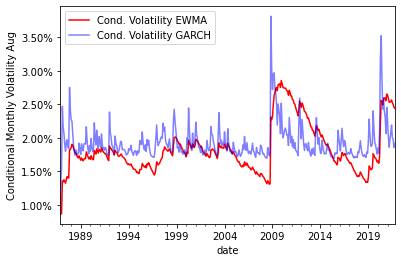

In [44]:
ax = (portfolio_ret_m_aug['cond_vol_emwa']*100).plot(c='red', label = 'Cond. Volatility EWMA')
ax = (portfolio_ret_m_aug['cond_vol_garch']*100).plot(c='blue', alpha=0.5, label = 'Cond. Volatility GARCH')
plt.ylabel('Conditional Monthly Volatility Aug')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

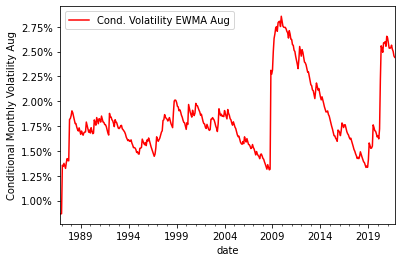

In [45]:
ax = (portfolio_ret_m_aug['cond_vol_emwa']*100).plot(c='red', label = 'Cond. Volatility EWMA Aug')
plt.ylabel('Conditional Monthly Volatility Aug')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

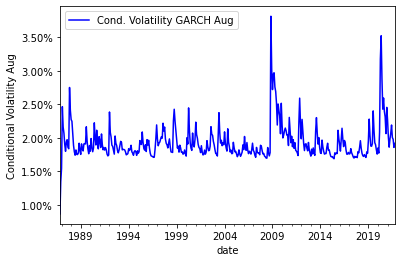

In [46]:
ax = (portfolio_ret_m_aug['cond_vol_garch']*100).plot(c='blue', label = 'Cond. Volatility GARCH Aug')
plt.ylabel('Conditional Volatility Aug')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

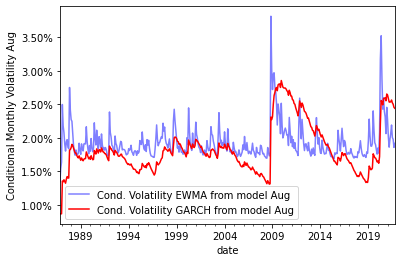

In [47]:
ax = ((((res_garch_m_aug.conditional_volatility**2)/10000)**0.5)*100).plot(c='blue', alpha=0.5, label = 'Cond. Volatility EWMA from model Aug')
ax = ((((res_m_aug.conditional_volatility**2)/10000)**0.5)*100).plot(c='red', label = 'Cond. Volatility GARCH from model Aug')
plt.ylabel('Conditional Monthly Volatility Aug')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

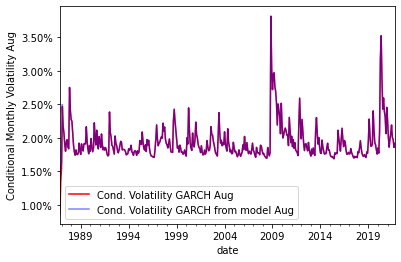

In [48]:
ax = (portfolio_ret_m_aug['cond_vol_garch']*100).plot(c='red', label = 'Cond. Volatility GARCH Aug')
ax = ((((res_garch_m_aug.conditional_volatility**2)/10000)**0.5)*100).plot(c='blue', alpha=0.5, label = 'Cond. Volatility GARCH from model Aug')
plt.ylabel('Conditional Monthly Volatility Aug')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

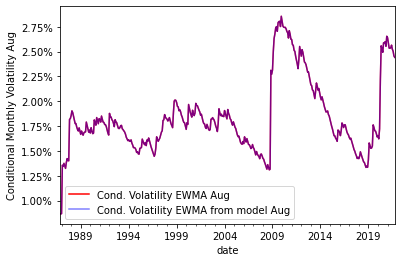

In [49]:
ax = (portfolio_ret_m_aug['cond_vol_emwa']*100).plot(c='red', label = 'Cond. Volatility EWMA Aug')
ax = ((((res_m_aug.conditional_volatility**2)/10000)**0.5)*100).plot(c='blue', alpha=0.5, label = 'Cond. Volatility EWMA from model Aug')
plt.ylabel('Conditional Monthly Volatility Aug')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [50]:
portfolio_ret_m_aug['model_vol_garch']=((res_garch_m_aug.conditional_volatility**2)/10000)**0.5
portfolio_ret_m_aug['model_vol_emwa']=((res_m_aug.conditional_volatility**2)/10000)**0.5

In [51]:
portfolio_ret_m_aug['z_garch'] = portfolio_ret_m_aug['ret']/portfolio_ret_m_aug['cond_vol_garch']
portfolio_ret_m_aug['z_emwa'] = portfolio_ret_m_aug['ret']/portfolio_ret_m_aug['cond_vol_emwa']

In [52]:
for g in range(0, len(portfolio_ret_m_aug)-1):
    portfolio_ret_m_aug.iloc[g, 9] = portfolio_ret_m_aug.iloc[g,7] * forc_vol_emwa_m_aug

In [53]:
for h in range(0, len(portfolio_ret_m_aug)-1):
    portfolio_ret_m_aug.iloc[h, 10] = portfolio_ret_m_aug.iloc[h,8] * forc_vol_garch_m_aug

In [54]:
portfolio_ret_m_aug

,ret,cond_var_garch,cond_var_emwa,cond_vol_garch,cond_vol_emwa,model_vol_garch,model_vol_emwa,z_garch,z_emwa,resc_r_garch,resc_r_emwa
date,,,,,,,,,,,
1986-11-30,0.008662,0.000075,0.000075,0.008662,0.008662,0.013462,0.008662,1.000000,1.000000,0.024584,0.020643
1986-12-31,-0.009333,0.000181,0.000075,0.013462,0.008662,0.015410,0.008662,-0.693293,-1.077488,-0.017044,-0.022242
1987-01-31,0.053083,0.000239,0.000076,0.015459,0.008689,0.016394,0.008689,3.433889,6.109023,0.084417,0.126106
1987-02-28,0.010155,0.000608,0.000184,0.024661,0.013563,0.024979,0.013563,0.411774,0.748745,0.010123,0.015456
1987-03-31,0.019824,0.000467,0.000181,0.021613,0.013444,0.021806,0.013444,0.917233,1.474546,0.022549,0.030438
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,-0.011192,0.000481,0.000658,0.021921,0.025647,0.021921,0.025647,-0.510588,-0.436399,-0.012552,-0.009008
2021-07-31,0.019344,0.000402,0.000637,0.020056,0.025233,0.020056,0.025233,0.964475,0.766581,0.023710,0.015824
2021-08-31,0.006706,0.000392,0.000626,0.019790,0.025027,0.019790,0.025027,0.338871,0.267962,0.008331,0.005531


In [55]:
mean_garch_m_aug = portfolio_ret_m_aug['z_garch'].mean()
std_garch_m_aug = portfolio_ret_m_aug['z_garch'].std()
max_garch_m_aug = portfolio_ret_m_aug['z_garch'].max() 
min_garch_m_aug = portfolio_ret_m_aug['z_garch'].min()
kurt_garch_m_aug = sp.kurtosis(portfolio_ret_m_aug['z_garch'])
skew_garch_m_aug = sp.skew(portfolio_ret_m_aug['z_garch'])

In [56]:
mean_ewma_m_aug = portfolio_ret_m_aug['z_emwa'].mean()
std_ewma_m_aug = portfolio_ret_m_aug['z_emwa'].std()
max_ewma_m_aug = portfolio_ret_m_aug['z_emwa'].max() 
min_ewma_m_aug = portfolio_ret_m_aug['z_emwa'].min()
kurt_ewma_m_aug = sp.kurtosis(portfolio_ret_m_aug['z_emwa'])
skew_ewma_m_aug = sp.skew(portfolio_ret_m_aug['z_emwa'])

## Statistics Table

In [57]:
df_stats_aug = pd.DataFrame(index=['min', 'max', 'mean', 'kurtosis', 'skewness'])

In [58]:
df_stats_aug['Returs'] = [min_m_aug, max_m_aug, mean_m_aug, kurt_m_aug, skew_m_aug]
df_stats_aug['Normalized Returns'] = [min_norm_m_aug, max_norm_m_aug, mean_norm_m_aug, kurt_norm_m_aug, skew_norm_m_aug]
df_stats_aug['Garch z-scores'] = [min_garch_m_aug, max_garch_m_aug, mean_garch_m_aug, kurt_garch_m_aug, skew_garch_m_aug]
df_stats_aug['Ewma z-scores'] = [min_ewma_m_aug, max_ewma_m_aug, mean_ewma_m_aug, kurt_ewma_m_aug, skew_ewma_m_aug]

df_stats_aug.applymap('{:,.2f}'.format)

,Returs,Normalized Returns,Garch z-scores,Ewma z-scores
min,-0.10,-5.60,-5.42,-7.33
max,0.07,3.34,3.43,6.11
mean,0.01,-0.00,0.34,0.36
kurtosis,3.21,3.21,3.82,8.75
skewness,-0.74,-0.74,-0.88,-0.97


# Prepating new DataFrame to generate risk measures

In [59]:
df_returns_m_aug = pd.DataFrame()

In [60]:
df_returns_m_aug['Returns'] = portfolio_ret_m_aug['ret']
df_returns_m_aug['Returns_Garch'] = portfolio_ret_m_aug['resc_r_garch']
df_returns_m_aug['Returns_Emwa'] = portfolio_ret_m_aug['resc_r_emwa']

df_returns_m_aug

,Returns,Returns_Garch,Returns_Emwa
date,,,
1986-11-30,0.008662,0.024584,0.020643
1986-12-31,-0.009333,-0.017044,-0.022242
1987-01-31,0.053083,0.084417,0.126106
1987-02-28,0.010155,0.010123,0.015456
1987-03-31,0.019824,0.022549,0.030438
...,...,...,...
2021-06-30,-0.011192,-0.012552,-0.009008
2021-07-31,0.019344,0.023710,0.015824
2021-08-31,0.006706,0.008331,0.005531


## Generating Risk Measures for each Look-back Period

In [61]:
df_risk_measures_m_aug = pd.DataFrame(index=['VaR_PreC','VaR_PostC','ES_PreC','ES_PostC'], columns=['Param', 'Hist', 'Fhist_G', 'Fhist_E', 'Whist'])

In [62]:
df_25_m_aug = df_returns_m_aug.iloc[-25:,:]

df_25_m_aug

,Returns,Returns_Garch,Returns_Emwa
date,,,
2019-10-31,0.008543,0.011069,0.010379
2019-11-30,0.002952,0.003984,0.003641
2019-12-31,0.019357,0.027068,0.024344
2020-01-31,0.002543,0.003378,0.003173
2020-02-29,-0.033245,-0.046098,-0.042315
2020-03-31,-0.072137,-0.084956,-0.086505
2020-04-30,0.068103,0.052725,0.063484
2020-05-31,0.017470,0.012189,0.014097
2020-06-30,0.012536,0.010712,0.010224


In [63]:
lb_25_vol_m_aug= ((df_25_m_aug['Returns']**2).mean())**0.5

In [64]:
var_param_m_aug = sp.norm.ppf(0.95)*lb_25_vol_m_aug

In [65]:
es_param_m_aug = sp.norm.pdf(sp.norm.ppf(0.95))*lb_25_vol_m_aug/0.05

In [66]:
var_25_hist_m_aug = df_25_m_aug['Returns'].quantile(q=0.05)

In [67]:
es_25_hist_m_aug = (df_25_m_aug['Returns'][(df_25_m_aug['Returns']<df_25_m_aug['Returns'].quantile(q=0.05))]).mean()

In [68]:
var_25_fhist_g_m_aug = df_25_m_aug['Returns_Garch'].quantile(q=0.05)

In [69]:
es_25_fhist_g_m_aug= (df_25_m_aug['Returns_Garch'][(df_25_m_aug['Returns_Garch']<df_25_m_aug['Returns_Garch'].quantile(q=0.05))]).mean()

In [70]:
var_25_fhist_e_m_aug = df_25_m_aug['Returns_Emwa'].quantile(q=0.05)

In [71]:
es_25_fhist_e_m_aug = (df_25_m_aug['Returns_Emwa'][(df_25_m_aug['Returns_Emwa']<df_25_m_aug['Returns_Emwa'].quantile(q=0.05))]).mean()

In [72]:
weights_emwa_25_m_aug=weights_emwa_m_aug.loc[df_25_m_aug.index,:]
adj_m_aug=lamb_m_aug**25
n_w_m_aug=weights_emwa_25_m_aug['weights']/(1-adj_m_aug)
df_25_m_aug['weights']=n_w_m_aug
df_25_m_aug['weights'].sum()

1.0

In [73]:
df_25_m_aug.sort_values('Returns', inplace=True)
df_25_m_aug['acum_weights'] = 0

for y in range(0, len(df_25_m_aug.index)):
    if y==0:
        df_25_m_aug.iloc[y, 4] = df_25_m_aug.iloc[y, 3]
    else: df_25_m_aug.iloc[y, 4] = df_25_m_aug.iloc[y-1, 4] + df_25_m_aug.iloc[y, 3]

In [74]:
w_hist_df_m_aug=df_25_m_aug[df_25_m_aug['acum_weights']<=0.05]

hr_m_aug=df_25_m_aug.iloc[len(w_hist_df_m_aug),0]
hw_m_aug=df_25_m_aug.iloc[len(w_hist_df_m_aug),4]
lr_m_aug=w_hist_df_m_aug.iloc[-1,0]
lw_m_aug=w_hist_df_m_aug.iloc[-1,4]

w_hist_VaR_m_aug=lr_m_aug+(0.05-lw_m_aug)*(hr_m_aug-lr_m_aug)/(hw_m_aug-lw_m_aug)
w_hist_ES_m_aug=(w_hist_df_m_aug['Returns']*w_hist_df_m_aug['weights']).sum()/0.05

In [75]:
VaR_25_m_aug = [var_param_m_aug, -var_25_hist_m_aug, -var_25_fhist_g_m_aug, -var_25_fhist_e_m_aug, -w_hist_VaR_m_aug]
ES_25_m_aug = [es_param_m_aug, -es_25_hist_m_aug, -es_25_fhist_g_m_aug, -es_25_fhist_e_m_aug, -w_hist_ES_m_aug]

In [76]:
df_risk_measures_m_aug.loc['VaR_PreC']=VaR_25_m_aug
df_risk_measures_m_aug.loc['ES_PreC']=ES_25_m_aug

In [77]:
(df_risk_measures_m_aug*100).applymap('{:,.2f}%'.format)

,Param,Hist,Fhist_G,Fhist_E,Whist
VaR_PreC,4.86%,3.23%,4.27%,3.84%,4.26%
VaR_PostC,nan%,nan%,nan%,nan%,nan%
ES_PreC,6.10%,5.27%,6.55%,6.44%,4.17%
ES_PostC,nan%,nan%,nan%,nan%,nan%


### PostCovid

In [78]:
df_13_m_aug = df_returns_m_aug.iloc[-13:,:]

df_13_m_aug

,Returns,Returns_Garch,Returns_Emwa
date,,,
2020-10-31,-0.009030,-0.009594,-0.007171
2020-11-30,0.044458,0.052960,0.035938
2020-12-31,0.022502,0.022530,0.017501
2021-01-31,-0.000351,-0.000380,-0.000275
2021-02-28,0.000978,0.001195,0.000780
2021-03-31,0.024966,0.032965,0.020329
2021-04-30,0.026599,0.032981,0.021671
2021-05-31,0.031310,0.037200,0.025458
2021-06-30,-0.011192,-0.012552,-0.009008


In [79]:
lb_13_vol_m_aug= ((df_13_m_aug['Returns']**2).mean())**0.5

In [80]:
var_13_param_m_aug = sp.norm.ppf(0.95)*lb_13_vol_m_aug

In [81]:
es_13_param_m_aug = sp.norm.pdf(sp.norm.ppf(0.95))*lb_13_vol_m_aug/0.05

In [82]:
var_13_hist_m_aug = df_13_m_aug['Returns'].quantile(q=0.05)

In [83]:
es_13_hist_m_aug = (df_13_m_aug['Returns'][(df_13_m_aug['Returns']<df_13_m_aug['Returns'].quantile(q=0.05))]).mean()

In [84]:
var_13_fhist_g_m_aug = df_13_m_aug['Returns_Garch'].quantile(q=0.05)

In [85]:
es_13_fhist_g_m_aug = (df_13_m_aug['Returns_Garch'][(df_13_m_aug['Returns_Garch']<df_13_m_aug['Returns_Garch'].quantile(q=0.05))]).mean()

In [86]:
var_13_fhist_e_m_aug = df_13_m_aug['Returns_Emwa'].quantile(q=0.05)

In [87]:
es_13_fhist_e_m_aug = (df_13_m_aug['Returns_Emwa'][(df_13_m_aug['Returns_Emwa']<df_13_m_aug['Returns_Emwa'].quantile(q=0.05))]).mean()

In [88]:
weights_emwa_13_m_aug=weights_emwa_m_aug.loc[df_13_m_aug.index,:]
adj_m_aug=lamb_m_aug**13
n_w_m_aug=weights_emwa_13_m_aug['weights']/(1-adj_m_aug)
df_13_m_aug['weights']=n_w_m_aug
df_13_m_aug['weights'].sum()

1.0000000000000002

In [89]:
df_13_m_aug.sort_values('Returns', inplace=True)
df_13_m_aug['acum_weights'] = 0

for y in range(0, len(df_13_m_aug.index)):
    if y==0:
        df_13_m_aug.iloc[y, 4] = df_13_m_aug.iloc[y, 3]
    else: df_13_m_aug.iloc[y, 4] = df_13_m_aug.iloc[y-1, 4] + df_13_m_aug.iloc[y, 3]

In [90]:
#w_hist_df_m=df_13_m[df_13_m['acum_weights']<=0.05]

#hr_m=df_13_m.iloc[len(w_hist_df_m),0]
#hw_m=df_13_m.iloc[len(w_hist_df_m),4]
#lr_m=w_hist_df_m.iloc[-1,0]
#lw_m=w_hist_df_m.iloc[-1,4]

#w_hist_VaR_m=lr_m+(0.05-lw_m)/(hw_m-lw_m)*(hr_m-lr_m)
#w_hist_ES_m=(w_hist_df_m['Returns']*w_hist_df_m['weights']).sum()/0.05

# Here VaR and ES are the mimimum because the acumulative weights of the minimum return is already above 5%

w_hist_df_m_aug=pd.DataFrame(df_13_m_aug.iloc[0,:])
w_hist_VaR_m_aug=w_hist_df_m_aug.loc['Returns']
w_hist_VaR_m_aug=w_hist_VaR_m_aug[0]
w_hist_ES_m_aug=(w_hist_df_m_aug.loc['Returns']*w_hist_df_m_aug.loc['weights']).sum()/0.05

In [91]:
VaR_13_m_aug = [var_param_m_aug, -var_13_hist_m_aug, -var_13_fhist_g_m_aug, -var_13_fhist_e_m_aug, -w_hist_VaR_m_aug]
ES_13_m_aug = [es_param_m_aug, -es_13_hist_m_aug, -es_13_fhist_g_m_aug, -es_13_fhist_e_m_aug, -w_hist_ES_m_aug]

In [92]:
df_risk_measures_m_aug.loc['VaR_PostC']=VaR_13_m_aug
df_risk_measures_m_aug.loc['ES_PostC']=ES_13_m_aug

In [93]:
(df_risk_measures_m_aug*100).applymap('{:,.2f}%'.format)

,Param,Hist,Fhist_G,Fhist_E,Whist
VaR_PreC,4.86%,3.23%,4.27%,3.84%,4.26%
VaR_PostC,4.86%,1.50%,1.84%,1.23%,2.06%
ES_PreC,6.10%,5.27%,6.55%,6.44%,4.17%
ES_PostC,6.10%,2.06%,2.73%,1.73%,3.84%


# Evaluation of volatility

In [94]:
df_eval_m_aug = portfolio_ret_m_aug.iloc[24:,:]
bias_garch_m_aug =  df_eval_m_aug['z_garch'].std()
bias_ewma_m_aug =  df_eval_m_aug['z_emwa'].std()

df_bias_m_aug = pd.DataFrame(index=['Stdv'], columns=['Garch', 'EWMA'], data= [[bias_garch_m_aug,bias_ewma_m_aug]])
df_bias_m_aug.applymap('{:,.2f}'.format) 

,Garch,EWMA
Stdv,0.93,1.01


In [95]:
low_interval_confidence_m_aug = 1-(2/((len(portfolio_ret_m_aug)-25)))**0.5
high_interval_confidence_m_aug = 1+(2/((len(portfolio_ret_m_aug)-25)))**0.5

df_bias_int_m_aug = pd.DataFrame(index=['95% Confidence Intervals'], columns=['Low Interval', 'High Interval'], data= [[low_interval_confidence_m_aug, high_interval_confidence_m_aug]])
df_bias_int_m_aug.applymap('{:,.2f}'.format)  

,Low Interval,High Interval
95% Confidence Intervals,0.93,1.07


In [96]:
df_eval_m_aug[['garch_std','ewma_std']] = 5
z_m_aug = []

for i in range(0,len(df_eval_m_aug)):
    z_m_aug.append(portfolio_ret_m_aug.iloc[i:24+i,7].std())
    
df_eval_m_aug['garch_std'] = z_m_aug

In [97]:
y_m_aug = []

for i in range(0,len(df_eval_m_aug)):
    y_m_aug.append(portfolio_ret_m_aug.iloc[i:24+i,8].std())
    
df_eval_m_aug['ewma_std'] = y_m_aug

In [98]:
bias_garch_2_m_aug = abs((df_eval_m_aug['garch_std']-1)).mean()
bias_ewma_2_m_aug = abs((df_eval_m_aug['ewma_std']-1)).mean()

df_MRAD_m_aug = pd.DataFrame(index=['MRAD'], columns=['Garch', 'EWMA'], data= [[bias_garch_2_m_aug,bias_ewma_2_m_aug]])
df_MRAD_m_aug.applymap('{:,.2f}'.format)  

,Garch,EWMA
MRAD,0.21,0.23


In [99]:
skew_garch_m_aug =  sp.skew(df_eval_m_aug['z_garch'])
skew_ewma_m_aug =  sp.skew(df_eval_m_aug['z_emwa'])
skew_ret_m_aug =  sp.skew(df_eval_m_aug['ret'])
kurt_garch_m_aug =  sp.kurtosis(df_eval_m_aug['z_garch'])
kurt_ewma_m_aug =  sp.kurtosis(df_eval_m_aug['z_emwa'])
kurt_ret_m_aug =  sp.kurtosis(df_eval_m_aug['ret'])

zg_mn_m_aug=df_eval_m_aug['z_garch'].mean()
ze_mn_m_aug=df_eval_m_aug['z_garch'].mean()
r_mn_m_aug=df_eval_m_aug['ret'].mean()
zg_mdn_m_aug=df_eval_m_aug['z_emwa'].median()
ze_mdn_m_aug=df_eval_m_aug['z_emwa'].median()
r_mdn_m_aug=df_eval_m_aug['ret'].median()

r_skew_garch_m_aug =  (zg_mn_m_aug-zg_mdn_m_aug)/bias_garch_m_aug
r_skew_ewma_m_aug =  (ze_mn_m_aug-ze_mdn_m_aug)/bias_ewma_m_aug
r_skew_r_m_aug = (r_mn_m_aug-r_mdn_m_aug)/df_eval_m_aug['ret'].std()

df_dist_m_aug = pd.DataFrame(index=['Skew','Robust Skew','Kurtosis'], columns=['Ret','Garch', 'EWMA'], data= [[skew_ret_m_aug,skew_garch_m_aug,skew_ewma_m_aug],[r_skew_r_m_aug,r_skew_garch_m_aug,r_skew_ewma_m_aug],[kurt_ret_m_aug,kurt_garch_m_aug,kurt_ewma_m_aug]])
df_dist_m_aug.applymap('{:,.2f}'.format) 

,Ret,Garch,EWMA
Skew,-0.72,-0.92,-1.40
Robust Skew,-0.08,-0.13,-0.12
Kurtosis,3.25,3.80,8.51


In [100]:
df_eval_m_aug[['QL_G','QL_E','d']] = 5

df_eval_m_aug['QL_G']=np.log(df_eval_m_aug['z_garch']**2)-df_eval_m_aug['z_garch']**2
df_eval_m_aug['QL_E']=np.log(df_eval_m_aug['z_emwa']**2)-df_eval_m_aug['z_emwa']**2
df_eval_m_aug['d'] = df_eval_m_aug['QL_G'] - df_eval_m_aug['QL_E']

mean_d_m_aug = np.round(df_eval_m_aug['d'].mean(),2)
std_d_m_aug = np.round(df_eval_m_aug['d'].std()/((len(portfolio_ret_m_aug)-25)**0.5),2)
t_d_m_aug = np.round(mean_d_m_aug/std_d_m_aug.round(2),2)
sum_QL1_m_aug = np.round(df_eval_m_aug['QL_G'].sum(),2)
sum_QL2_m_aug = np.round(df_eval_m_aug['QL_E'].sum(),2)


df_QL_m_aug = pd.DataFrame(index=['Sum_QL','Avg_d','t_d'], columns=['Garch', 'EWMA', 'A-B'], data= [[f'{sum_QL1_m_aug:,}',f'{sum_QL2_m_aug:,}',''],['','',mean_d_m_aug],['','',t_d_m_aug]])
df_QL_m_aug

,Garch,EWMA,A-B
Sum_QL,-896.23,-923.83,
Avg_d,,,0.07
t_d,,,1.0


# Evaluation of VaR

In [101]:
df_eval_m_aug[['p_VaR_t','h_VaR_t','fhg_VaR_t','fhe_VaR_t','wh_VaR_t']] = 5

In [102]:
a_aug = []
for i in range(0,len(df_eval_m_aug)):
    v= portfolio_ret_m_aug.iloc[i:24+i,0].std()
    a_aug.append(-sp.norm.ppf(0.95)*v)
    
df_eval_m_aug['p_VaR_t'] = a_aug

b_aug = []
for i in range(0,len(df_eval_m_aug)):
    b_aug.append(portfolio_ret_m_aug.iloc[i:24+i,0].quantile(q=0.05))
    
df_eval_m_aug['h_VaR_t'] = b_aug

c_aug = []
for i in range(0,len(df_eval_m_aug)):
    if i < len(df_eval_m_aug)-1:
        c_aug.append((portfolio_ret_m_aug.iloc[i:24+i,0]*portfolio_ret_m_aug.iloc[24+i+1,3]/portfolio_ret_m_aug.iloc[i:24+i,3]).quantile(q=0.05))
    else:
        c_aug.append((portfolio_ret_m_aug.iloc[i:24+i,0]*forc_vol_garch_m_aug[0]/portfolio_ret_m_aug.iloc[i:24+i,3]).quantile(q=0.05))
    
df_eval_m_aug['fhg_VaR_t'] = c_aug

d_aug = []
for i in range(0,len(df_eval_m_aug)):
    if i < len(df_eval_m_aug)-1:
        d_aug.append((portfolio_ret_m_aug.iloc[i:24+i,0]*portfolio_ret_m_aug.iloc[24+i+1,4]/portfolio_ret_m_aug.iloc[i:24+i,4]).quantile(q=0.05))
    else:
        d_aug.append((portfolio_ret_m_aug.iloc[i:24+i,0]*forc_vol_emwa_m_aug[0]/portfolio_ret_m_aug.iloc[i:24+i,4]).quantile(q=0.05))
    
df_eval_m_aug['fhe_VaR_t'] = d_aug

In [103]:
e_aug = []
for i in range(0,len(df_eval_m_aug)):
    weights_temp_aug=[]
    temp_aug=[]
    w_temp_df_aug=[]
    s_aug=0
    
    weights_temp_aug = weights_emwa_m_aug.iloc[i:24+i,0]
    s_aug = weights_temp_aug.sum()
    weights_temp_aug = weights_temp_aug/s_aug 
    temp_aug = pd.DataFrame(portfolio_ret_m_aug.iloc[i:24+i,0])
    temp_aug['w'] = weights_temp_aug
    temp_aug.sort_values('ret', inplace=True)
    temp_aug['acum_weights'] = 0
    for y in range(0, len(temp_aug.index)):
        if y==0:
            temp_aug.iloc[y, 2] = temp_aug.iloc[y, 1]
        else: temp_aug.iloc[y, 2] = temp_aug.iloc[y-1, 2] + temp_aug.iloc[y, 1]
    w_temp_df_aug=temp_aug.loc[temp_aug['acum_weights']<=0.05,['ret','w','acum_weights']]
    hr_t_aug=temp_aug.iloc[len(w_temp_df_aug),0]
    hw_t_aug=temp_aug.iloc[len(w_temp_df_aug),2]
    if len(w_temp_df_aug.index) > 0:
        lr_t_aug=w_temp_df_aug.iloc[-1,0]
        lw_t_aug=w_temp_df_aug.iloc[-1,2]
        e_aug.append(lr_t_aug+(0.05-lw_t_aug)/(hw_t_aug-lw_t_aug)*(hr_t_aug-lr_t_aug))
    else:
        e_aug.append(temp_aug.iloc[0,0])
    
df_eval_m_aug['wh_VaR_t'] = e_aug

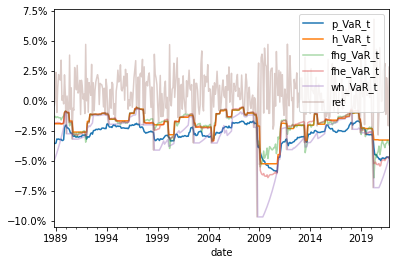

In [104]:
ax = (df_eval_m_aug[['p_VaR_t','h_VaR_t']]*100).plot()
ax = (df_eval_m_aug['fhg_VaR_t']*100).plot(alpha=0.4)
ax = (df_eval_m_aug['fhe_VaR_t']*100).plot(alpha=0.4)
ax = (df_eval_m_aug['wh_VaR_t']*100).plot(alpha=0.4)
ax = (df_eval_m_aug['ret']*100).plot(alpha=0.3)
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [105]:
VaR_t_m_aug=pd.DataFrame(index=df_eval_m_aug.index, columns= ['p_VaR_t','h_VaR_t','fhg_VaR_t','fhe_VaR_t','wh_VaR_t'])

VaR_t_m_aug['p_VaR_t']= df_eval_m_aug['ret']<df_eval_m_aug['p_VaR_t']
VaR_t_m_aug['h_VaR_t']= df_eval_m_aug['ret']<df_eval_m_aug['h_VaR_t']
VaR_t_m_aug['fhg_VaR_t']= df_eval_m_aug['ret']<df_eval_m_aug['fhg_VaR_t']
VaR_t_m_aug['fhe_VaR_t']= df_eval_m_aug['ret']<df_eval_m_aug['fhe_VaR_t']
VaR_t_m_aug['wh_VaR_t']= df_eval_m_aug['ret']<df_eval_m_aug['wh_VaR_t']

VaR_t_2_m_aug=VaR_t_m_aug.groupby(pd.Grouper(freq='Y')).sum()
pd.DataFrame(columns=['Average Number of Excedences per Year'],data=VaR_t_2_m_aug.mean().round(2))

,Average Number of Excedences per Year
p_VaR_t,0.50
h_VaR_t,0.97
fhg_VaR_t,1.00
fhe_VaR_t,1.00
wh_VaR_t,0.59


Text(0, 0.5, 'Average Number of Excedences per Year')

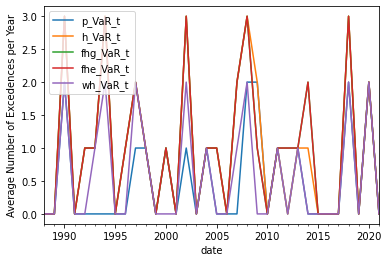

In [106]:
ax = VaR_t_2_m_aug.plot()
plt.ylabel('Average Number of Excedences per Year')

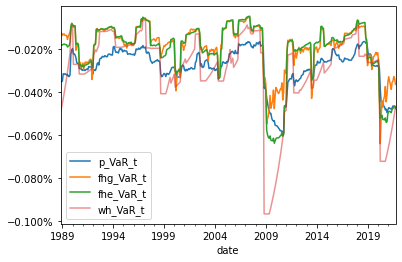

In [107]:
ax = df_eval_m_aug[['p_VaR_t','fhg_VaR_t','fhe_VaR_t']].plot()
ax = df_eval_m_aug['wh_VaR_t'].plot(alpha=0.5)
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Covariance estimation

In [108]:
se_vol_m_aug = 1/np.sqrt(len(df_25_m_aug)*2)

In [109]:
(vol_garch_for_m_aug[0]*(1+2*se_vol_m_aug),vol_garch_for_m_aug[0]*(1-2*se_vol_m_aug))

(0.026481188406051966, 0.014803979523801938)

In [110]:
vol_garch_for_m_aug[0]

0.020642583964926953

In [111]:
se_var_m_aug = np.sqrt((0.5*0.95)/(len(df_25_m_aug)*(sp.norm.pdf(-sp.norm.ppf(0.05))**2)))

In [112]:
((-sp.norm.ppf(0.05)+2*se_var_m_aug)*(var_25_fhist_g_m_aug/sp.norm.ppf(0.05)),(-sp.norm.ppf(0.05)-2*se_var_m_aug)*(var_25_fhist_g_m_aug/sp.norm.ppf(0.05)))

(0.11204766524244356, -0.026680133425846225)

In [113]:
-var_25_fhist_g_m_aug

0.04268376590829867

In [114]:
cf_std_m_aug = df_25_m_aug['Returns'].std()
cf_skw_m_aug = sp.skew(df_25_m_aug['Returns'])
cf_kurt_m_aug = sp.kurtosis(df_25_m_aug['Returns'])

cf_z_m_aug = sp.norm.ppf(0.05)+((sp.norm.ppf(0.05)**2)-1)*cf_skw_m_aug/6+((sp.norm.ppf(0.05)**3)-3*sp.norm.ppf(0.05))*cf_kurt_m_aug/24-(2*(sp.norm.ppf(0.05)**3)-5*sp.norm.ppf(0.05))*(cf_skw_m_aug**2)/36
cf_z_m_aug

-1.8105286004289372

In [115]:
cf_var_m_aug = -cf_z_m_aug*vol_garch_for_m_aug[0]
cf_var_m_aug

0.03737398865525602

In [116]:
df_returns_crap_m_aug = pd.DataFrame(df_returns_m_aug['Returns'])
df_returns_crap_m_aug['Abs Returns'] = np.abs(df_returns_m_aug['Returns'])
df_returns_crap_m_aug.sort_values('Abs Returns', inplace=True)
df_returns_crap_m_aug['Cum Returns'] = df_returns_m_aug['Returns']
df_returns_crap_m_aug.reset_index(inplace=True)
df_returns_crap_m_aug.drop(columns=['date'],inplace=True)

In [117]:
for y in range(0, len(df_returns_crap_m_aug)):
    if y==0:
        df_returns_crap_m_aug.iloc[y, 2] = df_returns_crap_m_aug.iloc[y, 0]
    else: df_returns_crap_m_aug.iloc[y, 2] = df_returns_crap_m_aug.iloc[y-1, 2] + df_returns_crap_m_aug.iloc[y, 0]
        
df_returns_crap_m_aug.tail(40)

,Returns,Abs Returns,Cum Returns
380,0.031127,0.031127,2.274030
381,0.031310,0.031310,2.305340
382,0.031500,0.031500,2.336840
383,0.031655,0.031655,2.368495
384,-0.031740,0.031740,2.336755
385,-0.033245,0.033245,2.303510
386,0.033629,0.033629,2.337139
387,0.034052,0.034052,2.371190
388,-0.034585,0.034585,2.336606
389,0.034669,0.034669,2.371275


<AxesSubplot:>

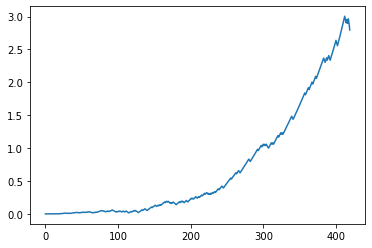

In [118]:
df_returns_crap_m_aug['Cum Returns'].plot()

In [120]:
2/420

0.004761904761904762